# Numerische Ableitung

## Vertiefung

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Beispiel: Stabilität einer Emulsion

#### Modell

Eine Emulsion ist eine Mischung zweier Stoffe (Phasen), die eigentlich nicht "gerne" gemischt werden. Typischerweise sind dies Öl und Wasser, z.B. Salatsauce, Mayonaise, flüssige Medikamente. Nach dem Emulgieren sollte 100% des Volumens im Emulsionszustand sein. Doch dies ist nicht stabil. Die Emulsion trennt sich langsam in die ölige, die wässrige und die emulgierte Phase auf. Modellieren wir dies mit einer Exponentialfunktion:

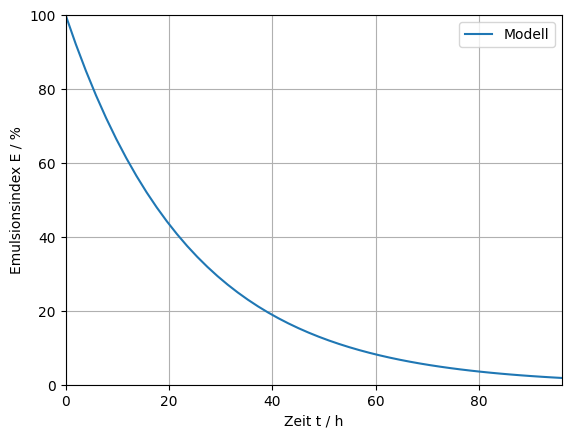

In [3]:
def emulsionsindex(t, tau=24):
    """Zeitverlauf des Emulsionsanteils (in %). Hier ist tau die charakteristische Zeitskala des Zerfalls."""
    return 100 * np.exp(-t / tau)


t = np.linspace(0, 4 * 24)
e = emulsionsindex(t)

plt.plot(t, e, label="Modell")
plt.xlabel("Zeit t / h")
plt.ylabel("Emulsionsindex E / %")
plt.xlim(t.min(), t.max())
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()


#### Daten erzeugen

Wir hätten diesen Prozess vermessen, zuerst recht häufig und später dann nur noch selten, weil sich nicht mehr viel ändert.

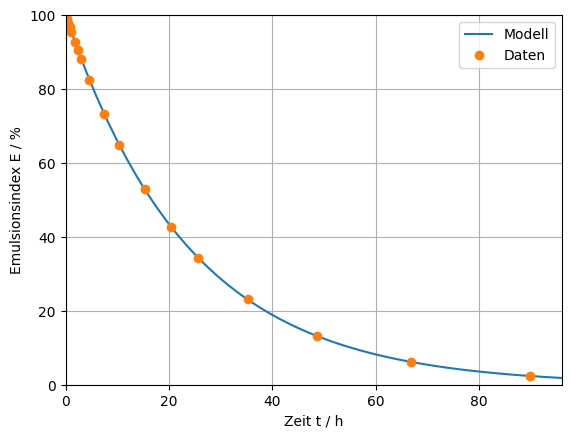

In [4]:
t_data = np.array([0, 0.25, 0.53, 0.76, 1.1, 1.8, 2.4, 3.01, 4.6, 7.5, 10.4, 15.3, 20.4, 25.7, 35.2, 48.7, 66.8, 89.9])
e_data = emulsionsindex(t_data)

plt.plot(t, e, label="Modell")
plt.plot(t_data, e_data, "o", label="Daten")
plt.xlabel("Zeit t / h")
plt.ylabel("Emulsionsindex E / %")
plt.xlim(t.min(), t.max())
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()


Punkte sind nicht äquidistant -> Sie haben *nicht* immer die *gleiche Distanz*. 


delta_y -> obere Punkt(rechts) - unterer Punkt (links )

### Ableitung ausgehend von Daten

Wie gehen wir vor, wenn wir keine analytische Funktion gegeben haben, sondern nur Datenpunkte?

Gegeben sind also $n$ Datenpunkte $(x_i, y_i)$, $i = 0, 1, \ldots, n-1$.


#### Gleichmässig verteilte Punkte

Sind alle $x$-Werte gleich weit voneinander entfernt, $x_{i+1} = x_{i} + h$ (äquidistant), so können wir analog zur Methode für die Ableitung von Funktionen den Mittelwert des vorwärtsgerichteten und rückwärtsgerichteten Differenzenquotienten nehmen:

$$ y'_i = \frac{y_{i+1} - y_{i-1}}{2h}\,,\ i = 1, 2, \ldots, n-2 $$

Am Rand, also für $i=0$ und $i=n-1$ klappt dies nicht mehr und man beschränkt sich eben auf den vorwärts- bzw. rückwärtsgerichteten Differenzenquotienten:

$$ y'_0 = \frac{y_{1} - y_{0}}{h}\,,\quad y'_{n-1} = \frac{y_{n-1} - y_{n-2}}{h} $$


#### Ungleichmässig verteilte Punkte (allgemeiner Fall)

Sind die Punkte nicht gleichmässig verteilt, wird es dann nur ein klein Wenig komplizierter:

$$ y'_i = \frac{1}{2}\left( \frac{y_{i+1} - y_{i}}{x_{i+1} - x_{i}} + \frac{y_{i} - y_{i-1}}{x_{i} - x_{i-1}} \right)\,,\ i = 1, 2, \ldots, n-2 $$

und an den Rändern entsprechend

$$ y'_0 = \frac{y_{1} - y_{0}}{y_{1} - y_{0}}\,,\quad y'_{n-1} = \frac{y_{n-1} - y_{n-2}}{y_{n-1} - y_{n-2}} $$

#### Implementation

- Wir berechnen die Differenzen benachbarter Punkte mit [`np.diff`](https://numpy.org/doc/stable/reference/generated/numpy.diff.html).
- Und dann verschieben wir sie gegenüber einander.

- **`np.diff` berechnet die differenz zwischen zwei Punkten in einem Array**

In [9]:
print(np.arange(4))
np.diff(np.arange(4))

[0 1 2 3]


array([1, 1, 1])

In [7]:
dy = np.diff(e_data)
dt = np.diff(t_data)

deriv = dy/dt
deriv


array([-4.14504043, -4.09952875, -4.05619435, -4.00833009, -3.92252326,
       -3.81767805, -3.72264687, -3.55643116, -3.24022027, -2.87142372,
       -2.44351095, -1.9842622 , -1.59796483, -1.17925909, -0.73517162,
       -0.38460197, -0.16543773])

In [15]:
dydt = dy/dt

#Um die Ableitung zu berechnen leere liste herstellen 
deriv


# [0:-1] / [1:] sind die verschiebung nach rechts und links
# diejenigen die keinen passenden Wert haben 
deriv = (dydt[0:-1]+dydt[1:])/2

print(deriv)
print(e_data.shape, deriv.shape)

[-4.12228459 -4.07786155 -4.03226222 -3.96542667 -3.87010065 -3.77016246
 -3.63953902 -3.39832571 -3.05582199 -2.65746734 -2.21388658 -1.79111352
 -1.38861196 -0.95721536 -0.5598868  -0.27501985]
(18,) (16,)


In [17]:
#Um die Ableitung zu berechnen leere liste herstellen 
deriv = np.empty_like(e_data)


# [0:-1] / [1:] sind die verschiebung nach rechts und links
# diejenigen die keinen passenden Wert haben 
deriv[1:-1] = (dydt[0:-1]+dydt[1:])/2

deriv[0] = dydt[0]
deriv[-1]= dydt[-1]
print(deriv)
print(e_data.shape, deriv.shape)

[-4.14504043 -4.12228459 -4.07786155 -4.03226222 -3.96542667 -3.87010065
 -3.77016246 -3.63953902 -3.39832571 -3.05582199 -2.65746734 -2.21388658
 -1.79111352 -1.38861196 -0.95721536 -0.5598868  -0.27501985 -0.16543773]
(18,) (18,)


### Vergleich mit NumPy Gradient

[`np.gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) anschauen.